In [ ]:
print("hello coders")

hello coders


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import prophet as Prophet


In [ ]:
#initializa the plotly
import plotly.io as  pio
pio.renderers.default = "colab"

In [ ]:
tsla=pd.read_csv("/tsla_1yr_data.csv")
tsla.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-01-03 00:00:00-05:00,118.470001,118.800003,104.639999,108.099998,231402800,0.0,0.0
1,2023-01-04 00:00:00-05:00,109.110001,114.589996,107.519997,113.639999,180389000,0.0,0.0
2,2023-01-05 00:00:00-05:00,110.510002,111.750000,107.160004,110.339996,157986300,0.0,0.0
3,2023-01-06 00:00:00-05:00,103.000000,114.389999,101.809998,113.059998,220911100,0.0,0.0
4,2023-01-09 00:00:00-05:00,118.959999,123.519997,117.110001,119.769997,190284000,0.0,0.0


In [ ]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          250 non-null    object 
 1   Open          250 non-null    float64
 2   High          250 non-null    float64
 3   Low           250 non-null    float64
 4   Close         250 non-null    float64
 5   Volume        250 non-null    int64  
 6   Dividends     250 non-null    float64
 7   Stock Splits  250 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
tsla.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.0,250.0
mean,217.075040,221.631680,212.674320,217.475240,1.373222e+08,0.0,0.0
std,42.282592,42.458512,41.831715,41.916800,3.577310e+07,0.0,0.0
min,103.000000,111.750000,101.809998,108.099998,6.512520e+07,0.0,0.0
25%,186.375004,189.937500,182.912502,186.122494,1.117632e+08,0.0,0.0
50%,223.564995,226.555000,218.019997,222.144997,1.285824e+08,0.0,0.0
75%,251.787495,257.992500,247.394993,253.019993,1.578840e+08,0.0,0.0
max,296.040009,299.290009,289.519989,293.339996,3.065906e+08,0.0,0.0


In [ ]:
px.area(tsla,x="Date",y="Close")

In [ ]:
px.area(tsla,x="Date",y="Volume")

In [ ]:
px.box(tsla,y="Close")

In [ ]:
tsla

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-01-03 00:00:00-05:00,118.470001,118.800003,104.639999,108.099998,231402800,0.0,0.0
1,2023-01-04 00:00:00-05:00,109.110001,114.589996,107.519997,113.639999,180389000,0.0,0.0
2,2023-01-05 00:00:00-05:00,110.510002,111.750000,107.160004,110.339996,157986300,0.0,0.0
3,2023-01-06 00:00:00-05:00,103.000000,114.389999,101.809998,113.059998,220911100,0.0,0.0
4,2023-01-09 00:00:00-05:00,118.959999,123.519997,117.110001,119.769997,190284000,0.0,0.0
...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,256.760010,258.220001,251.369995,252.539993,93249800,0.0,0.0
246,2023-12-26 00:00:00-05:00,254.490005,257.970001,252.910004,256.609985,86892400,0.0,0.0
247,2023-12-27 00:00:00-05:00,258.350006,263.339996,257.519989,261.440002,106494400,0.0,0.0
248,2023-12-28 00:00:00-05:00,263.660004,265.130005,252.710007,253.179993,113619900,0.0,0.0


In [ ]:
columns=["Date","Close"]
ndf=pd.DataFrame(tsla,columns=columns)
ndf

,Date,Close
0,2023-01-03 00:00:00-05:00,108.099998
1,2023-01-04 00:00:00-05:00,113.639999
2,2023-01-05 00:00:00-05:00,110.339996
3,2023-01-06 00:00:00-05:00,113.059998
4,2023-01-09 00:00:00-05:00,119.769997
...,...,...
245,2023-12-22 00:00:00-05:00,252.539993
246,2023-12-26 00:00:00-05:00,256.609985
247,2023-12-27 00:00:00-05:00,261.440002
248,2023-12-28 00:00:00-05:00,253.179993


In [ ]:
prophet_df=ndf.rename(columns={"Date":"ds","Close":"y"})
prophet_df

,ds,y
0,2023-01-03 00:00:00-05:00,108.099998
1,2023-01-04 00:00:00-05:00,113.639999
2,2023-01-05 00:00:00-05:00,110.339996
3,2023-01-06 00:00:00-05:00,113.059998
4,2023-01-09 00:00:00-05:00,119.769997
...,...,...
245,2023-12-22 00:00:00-05:00,252.539993
246,2023-12-26 00:00:00-05:00,256.609985
247,2023-12-27 00:00:00-05:00,261.440002
248,2023-12-28 00:00:00-05:00,253.179993


In [ ]:
# from prophet import Prophet
# m=Prophet()
# m.fit(prophet_df)


In [ ]:
from prophet import Prophet

# Convert 'ds' column to datetime objects without timezone
prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None)

m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygqrtxu2/bqcsuz5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygqrtxu2/plb01ty1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4608', 'data', 'file=/tmp/tmpygqrtxu2/bqcsuz5y.json', 'init=/tmp/tmpygqrtxu2/plb01ty1.json', 'output', 'file=/tmp/tmpygqrtxu2/prophet_modelz5nj49z4/prophet_model-20250124033226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:32:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:32:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=m.make_future_dataframe(periods=30)
future.tail()

,ds
275,2024-01-24 05:00:00
276,2024-01-25 05:00:00
277,2024-01-26 05:00:00
278,2024-01-27 05:00:00
279,2024-01-28 05:00:00


In [ ]:
future.head()

,ds
0,2023-01-03 05:00:00
1,2023-01-04 05:00:00
2,2023-01-05 05:00:00
3,2023-01-06 05:00:00
4,2023-01-09 05:00:00


In [ ]:
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-03 05:00:00,141.291023,112.778673,176.892680,141.291023,141.291023,3.734240,3.734240,3.734240,3.734240,3.734240,3.734240,0.0,0.0,0.0,145.025263
1,2023-01-04 05:00:00,141.785494,115.478673,176.642542,141.785494,141.785494,4.964411,4.964411,4.964411,4.964411,4.964411,4.964411,0.0,0.0,0.0,146.749906
2,2023-01-05 05:00:00,142.279966,113.657442,172.838391,142.279966,142.279966,2.393478,2.393478,2.393478,2.393478,2.393478,2.393478,0.0,0.0,0.0,144.673444
3,2023-01-06 05:00:00,142.774438,118.245927,177.888251,142.774438,142.774438,4.886473,4.886473,4.886473,4.886473,4.886473,4.886473,0.0,0.0,0.0,147.660911
4,2023-01-09 05:00:00,144.257854,118.308973,178.939266,144.257854,144.257854,4.654973,4.654973,4.654973,4.654973,4.654973,4.654973,0.0,0.0,0.0,148.912827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2024-01-24 05:00:00,233.046507,209.963472,268.710214,232.104887,233.852290,4.964411,4.964411,4.964411,4.964411,4.964411,4.964411,0.0,0.0,0.0,238.010918
276,2024-01-25 05:00:00,232.973677,203.466858,265.073451,231.973787,233.831997,2.393478,2.393478,2.393478,2.393478,2.393478,2.393478,0.0,0.0,0.0,235.367155
277,2024-01-26 05:00:00,232.900847,208.372287,267.362659,231.830748,233.810669,4.886473,4.886473,4.886473,4.886473,4.886473,4.886473,0.0,0.0,0.0,237.787320
278,2024-01-27 05:00:00,232.828017,220.260030,280.211635,231.652699,233.801416,17.735843,17.735843,17.735843,17.735843,17.735843,17.735843,0.0,0.0,0.0,250.563860


In [ ]:
px.line(forecast,x="ds",y="yhat")

In [ ]:
px.line(tsla,x="Date",y="Close")

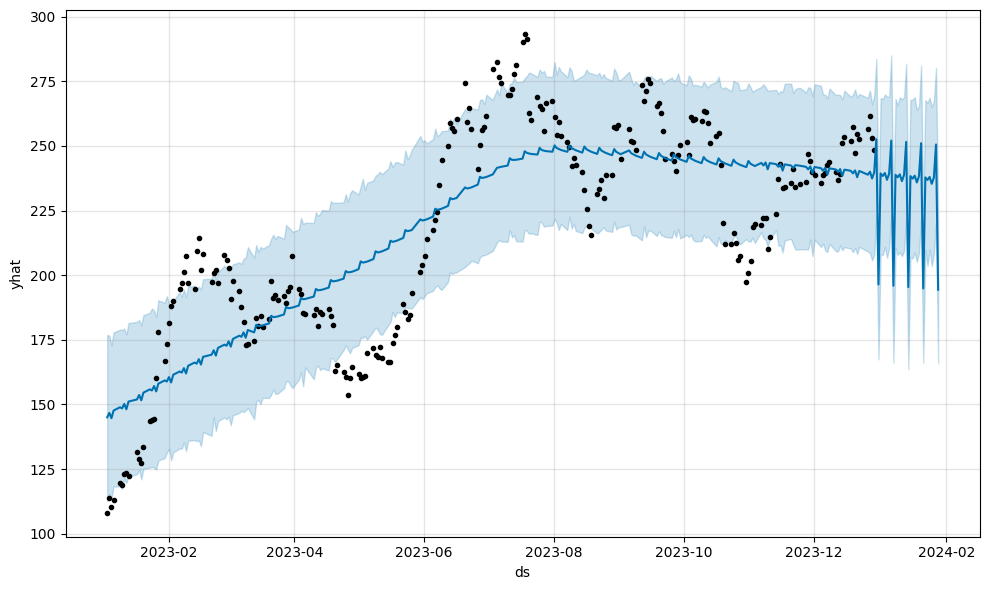

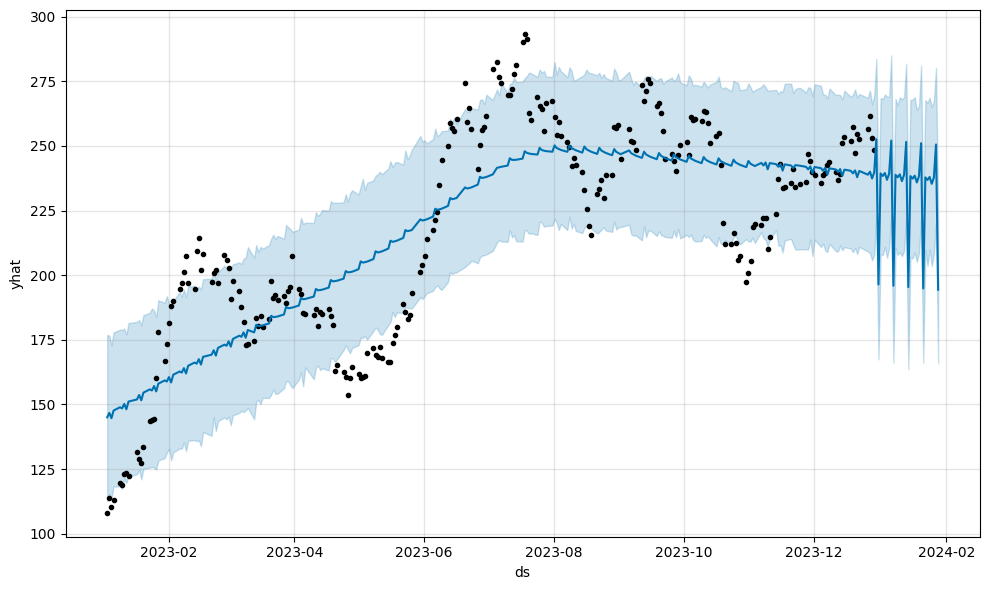

In [ ]:
figure=m.plot(forecast,xlabel="ds",ylabel="yhat")
figure

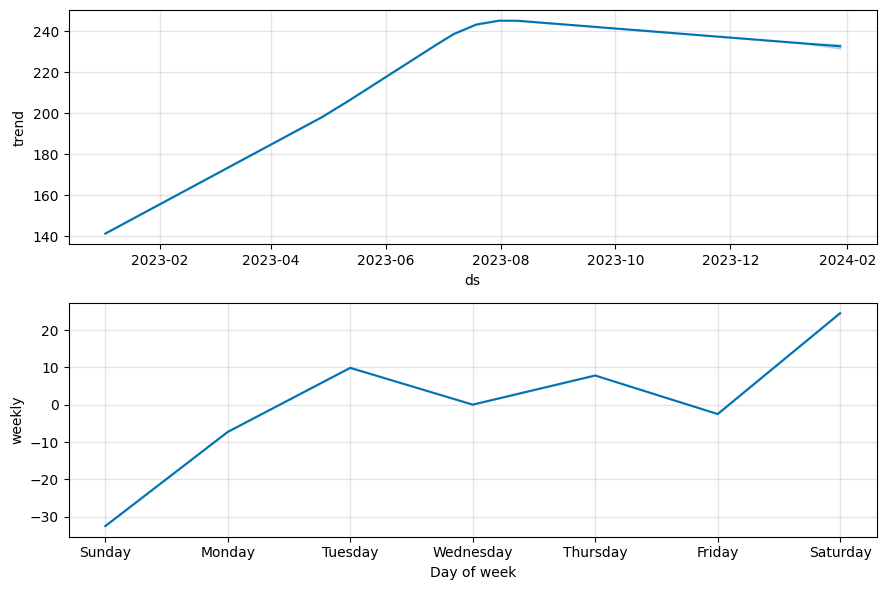

In [ ]:
figure2=m.plot_components(forecast)

In [ ]:
# prompt: from google.collab import files

from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>